<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_06_Unsupervised_Learning_AssignmentPascalMusabyimanacompleted_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.image as mpimg
from skimage import data, color, io, filters, morphology,transform, exposure, feature
from scipy import ndimage
from skimage.io import imread, imshow
from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

##  Clustering

A supermarket collected some data from its customers. The supermarket wants to use this data to better understand its customers. To do this, it wants to apply clustering. This way, customers with a similar profile are grouped together. This allows the supermarket to offer more targeted promotions to each cluster of customers.

You can find the data in the file 'customer.csv'.

In [ ]:
dataset = pd.read_csv('/content/Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data analysis

In [ ]:
# Remove CustomerID
dataset.drop(['CustomerID'], axis=1, inplace=True)


:Examine the distribution by gender. What is the ratio of male customers to female customers? Use the seaborn countplot for this.

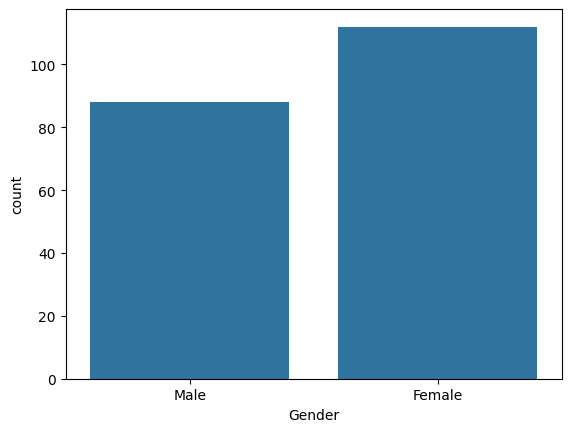

In [ ]:
# Distribution by Gender
sns.countplot(x='Gender', data=dataset)
plt.show()

Determine if women appear to spend more money than men. Visualize this with a boxplot.

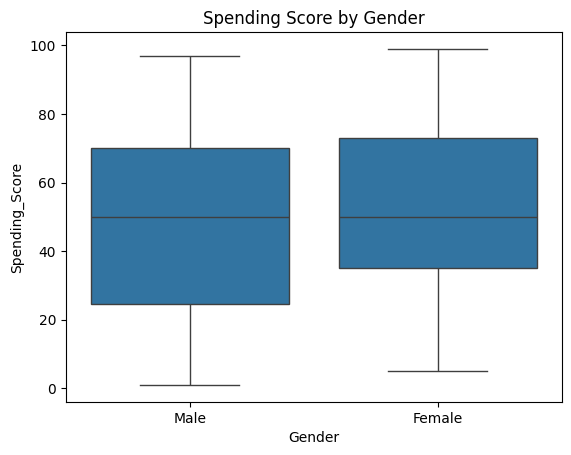

In [ ]:
# Boxplot of spending by gender
sns.boxplot(x='Gender', y='Spending_Score', data=dataset)
plt.title('Spending Score by Gender')
plt.show()


Draw the histograms of Age, Income, and Spending score. You can use the seaborn distplot for this. Are they normally distributed?

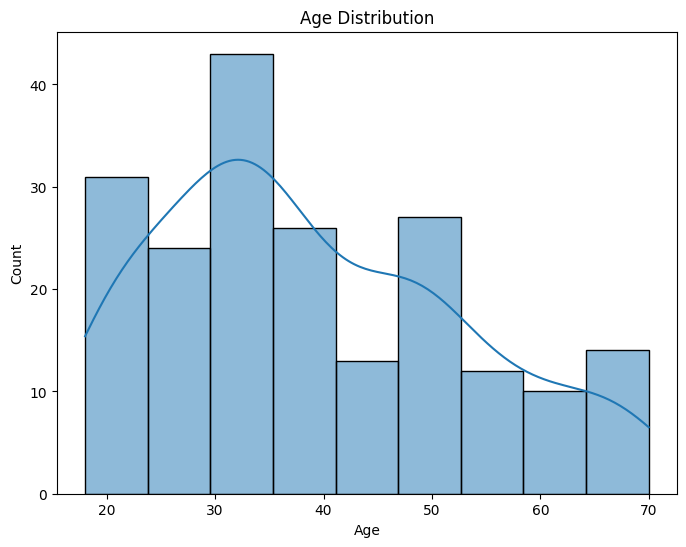

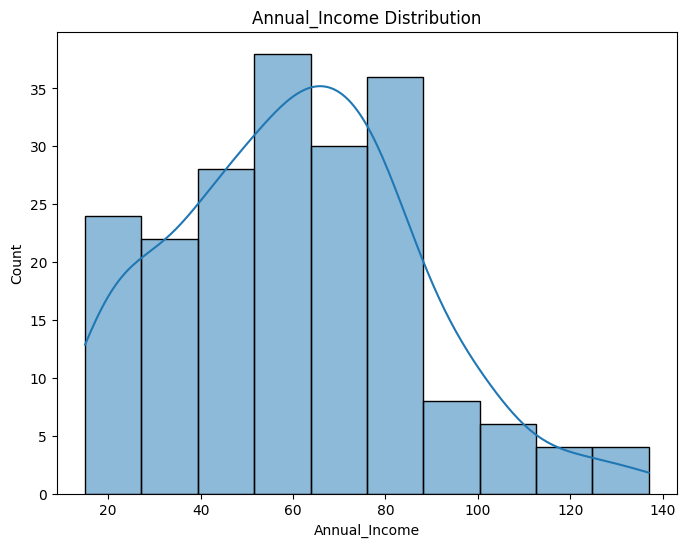

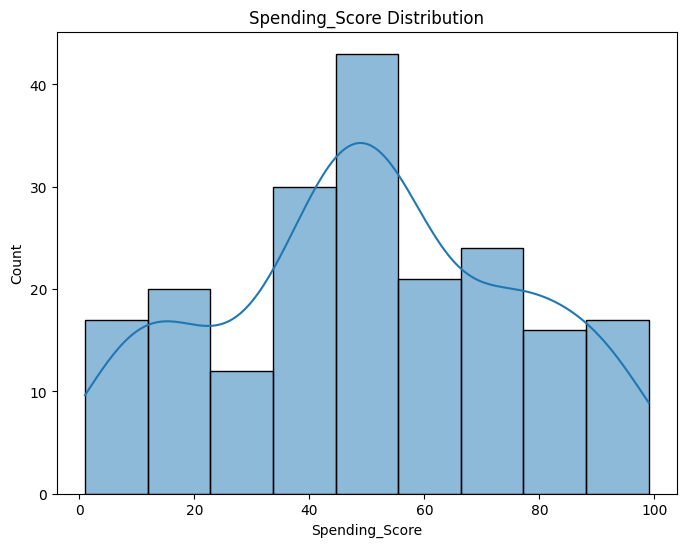

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

# Assuming dataset is already loaded (e.g., dataset = pd.read_csv('Customers.csv'))
# Display distributions of Age, Annual_Income, and Spending_Score
features = ['Age', 'Annual_Income', 'Spending_Score']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

no not even distrubuted



### Clustering

Time to search for a good clustering of the customers.

In clustering, it's important to first scale the features. Many clustering techniques use a distance function to determine the similarity between different data points. Therefore, it's necessary for all variables to be on the same scale.

Draw a scatterplot between Age and Spending Score.
How many clusters do you think you can find in the scatterplot?
Scale the features Age and Spending Score.
Apply K-means clustering. Choose a K value (number of clusters) based on your estimation. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
Visualize the clusters on the scatterplot.
Now, search for the optimal number of clusters using the elbow method. To do this, calculate the total squared distance of all data points within a cluster to the center of the cluster they belong to. This is automatically calculated during training. You can retrieve this value after training via the inertia_ property. Create a for-loop where you vary K between 1 and 10. For each K value, train the K-means and visualize the clusters. Also, keep track of the inertia_ each time. Then, plot the 'elbow curve' by plotting the inertia_ against K. The point where the bend (elbow) is located is a good indication of the number of clusters to choose.
Repeat the above steps for the scatterplot between Annual Income and Spending Score.



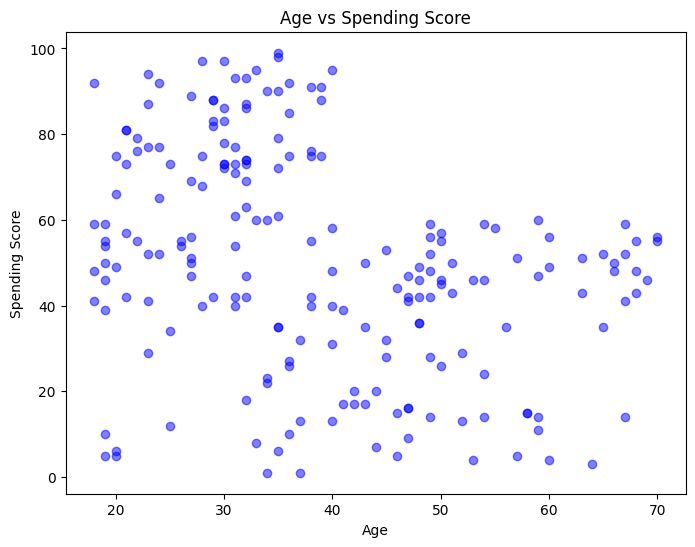

In [ ]:
# Clustering Age and Spending_Score

# Scatterplot: Age vs. Spending Score
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Age'], dataset['Spending_Score'], c='blue', alpha=0.5)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

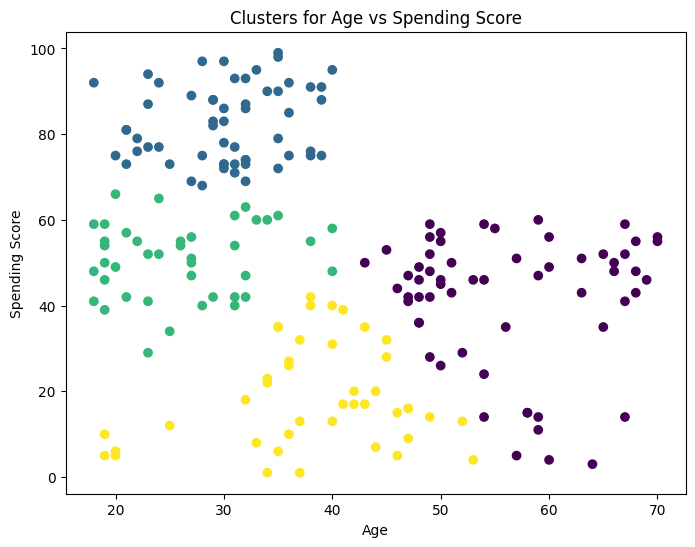

In [ ]:
# Scale features
scaler = MinMaxScaler()
dataset[['Age_scaled', 'Spending_Score_scaled']] = scaler.fit_transform(dataset[['Age', 'Spending_Score']])

# Apply K-means with estimated number of clusters (e.g., 4 based on scatterplot)
kmeans_age_spending = KMeans(n_clusters=4, random_state=42)
kmeans_age_spending.fit(dataset[['Age_scaled', 'Spending_Score_scaled']])
dataset['Cluster_Age_Spending'] = kmeans_age_spending.labels_

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Age'], dataset['Spending_Score'], c=dataset['Cluster_Age_Spending'], cmap='viridis')
plt.title('Clusters for Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

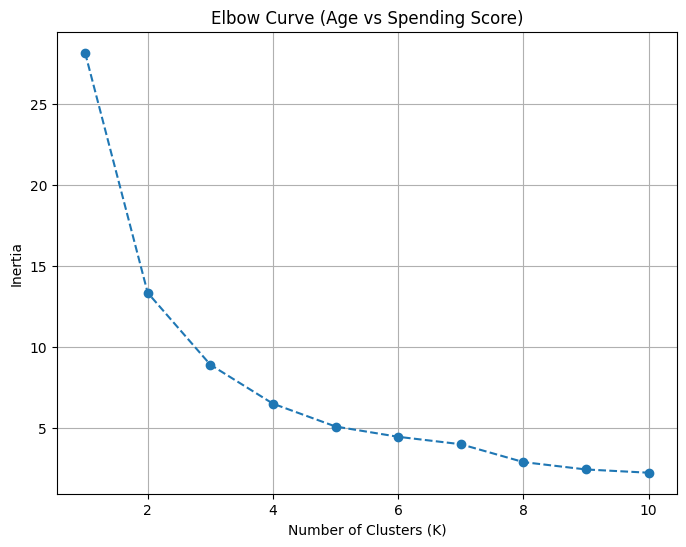

In [ ]:
# Elbow method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset[['Age_scaled', 'Spending_Score_scaled']])
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Curve (Age vs Spending Score)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

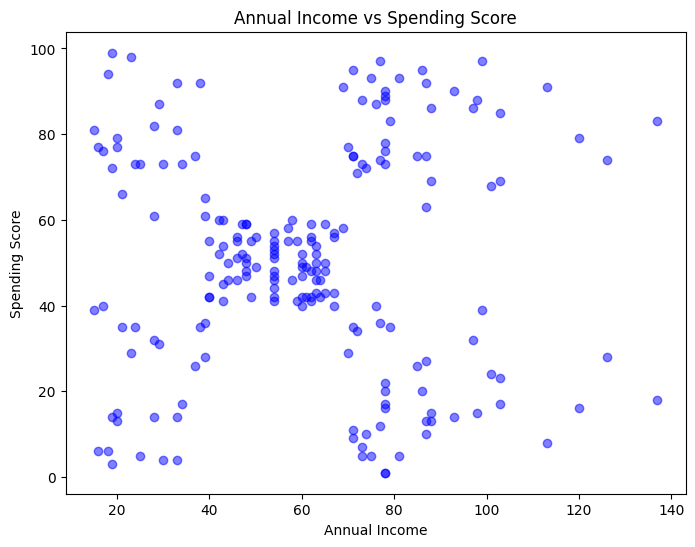

In [ ]:
# Clustering Annual_Income and Spending_Score

# Scatterplot: Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Annual_Income'], dataset['Spending_Score'], c='blue', alpha=0.5)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

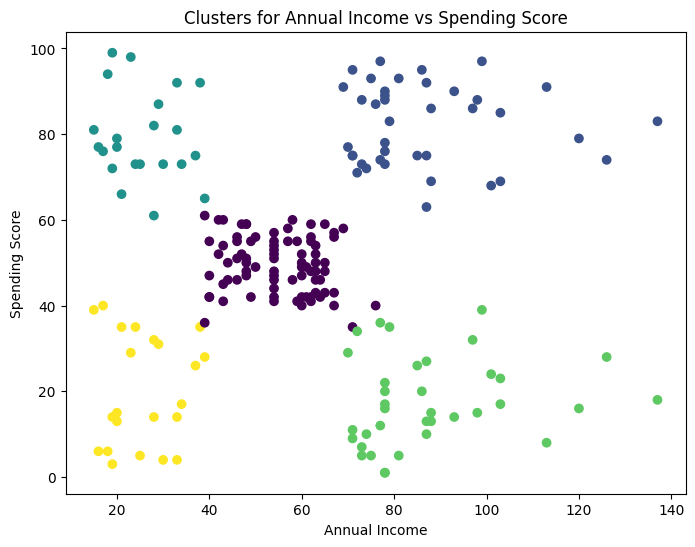

In [ ]:
# Scale features
dataset[['Annual_Income_scaled', 'Spending_Score_scaled']] = scaler.fit_transform(dataset[['Annual_Income', 'Spending_Score']])

# Apply K-means with estimated number of clusters (e.g., 5 based on scatterplot)
kmeans_income_spending = KMeans(n_clusters=5, random_state=42)
kmeans_income_spending.fit(dataset[['Annual_Income_scaled', 'Spending_Score_scaled']])
dataset['Cluster_Income_Spending'] = kmeans_income_spending.labels_

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Annual_Income'], dataset['Spending_Score'], c=dataset['Cluster_Income_Spending'], cmap='viridis')
plt.title('Clusters for Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

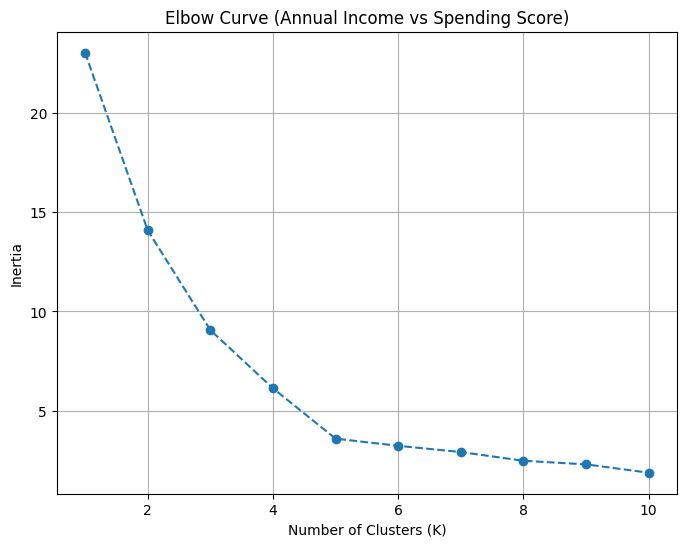

In [ ]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset[['Annual_Income_scaled', 'Spending_Score_scaled']])
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Curve (Annual Income vs Spending Score)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Now try to cluster the scatterplot between Gender and Spending Score. You will notice that there is affinity between the data points. A method suitable for clustering this connected data is spectral clustering. Apply this to Annual Income and Spending Score.
More information about SpectralClustering can be found at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

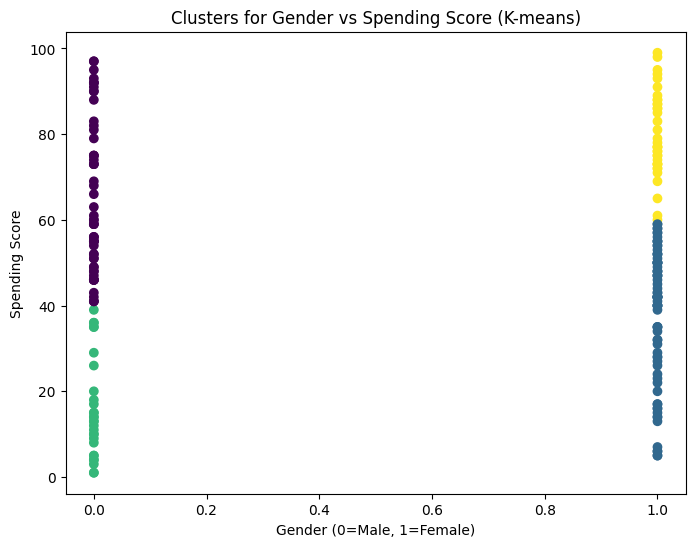

In [ ]:
# Clustering Gender and Spending Score. First using K-means, then using Spectral Clustering.
# Encode Gender as numeric
dataset['Gender_numeric'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

# Scale Spending_Score (Gender_numeric is binary, scaling optional)
dataset['Spending_Score_scaled'] = scaler.fit_transform(dataset[['Spending_Score']])

# Apply K-means
kmeans_gender_spending = KMeans(n_clusters=4, random_state=42)
dataset['Cluster_Gender_Spending_KMeans'] = kmeans_gender_spending.fit_predict(dataset[['Gender_numeric', 'Spending_Score_scaled']])

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Gender_numeric'], dataset['Spending_Score'], c=dataset['Cluster_Gender_Spending_KMeans'], cmap='viridis')
plt.title('Clusters for Gender vs Spending Score (K-means)')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Spending Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


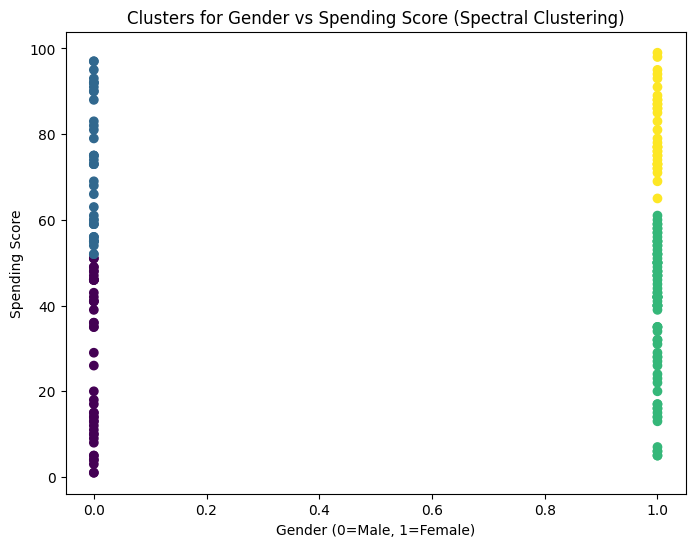

In [ ]:
# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')
dataset['Cluster_Gender_Spending_Spectral'] = spectral.fit_predict(dataset[['Gender_numeric', 'Spending_Score_scaled']])

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Gender_numeric'], dataset['Spending_Score'], c=dataset['Cluster_Gender_Spending_Spectral'], cmap='viridis')
plt.title('Clusters for Gender vs Spending Score (Spectral Clustering)')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Spending Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


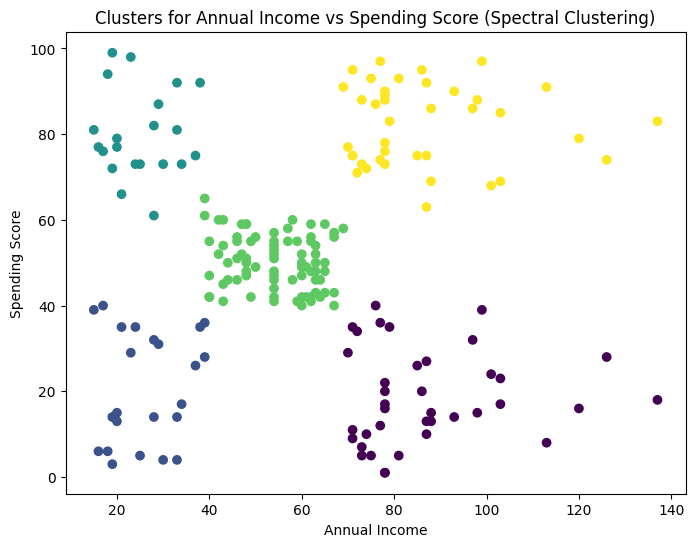

In [ ]:
# Apply Spectral Clustering to Annual Income vs Spending Score
spectral_income_spending = SpectralClustering(n_clusters=5, random_state=42, affinity='nearest_neighbors')
dataset['Cluster_Income_Spending_Spectral'] = spectral_income_spending.fit_predict(dataset[['Annual_Income_scaled', 'Spending_Score_scaled']])

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Annual_Income'], dataset['Spending_Score'], c=dataset['Cluster_Income_Spending_Spectral'], cmap='viridis')
plt.title('Clusters for Annual Income vs Spending Score (Spectral Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Find the clusters using K-means based on Age, Annual Income, and Spending Score. Also, use the elbow method to determine the number of clusters.

After clustering, revert the data back to its original scale. Most scalers have an inverse_transform method that you can use for rescaling.

Plot the scatterplot and clusters in 3D. You are free to choose a library of choice for this.

In how many clusters have you classified the data? Can you describe them? Which ones are interesting for the supermarket to focus on if they want to increase their profit?

In [ ]:
# Clustering Age, Annual_Income and Spending_Score + 3D visualization and final interpretation
# Scale features
dataset[['Age_scaled', 'Annual_Income_scaled', 'Spending_Score_scaled']] = scaler.fit_transform(
    dataset[['Age', 'Annual_Income', 'Spending_Score']])

# Apply K-means
kmeans_3d = KMeans(n_clusters=5, random_state=42)
dataset['Cluster_3D'] = kmeans_3d.fit_predict(dataset[['Age_scaled', 'Annual_Income_scaled', 'Spending_Score_scaled']])

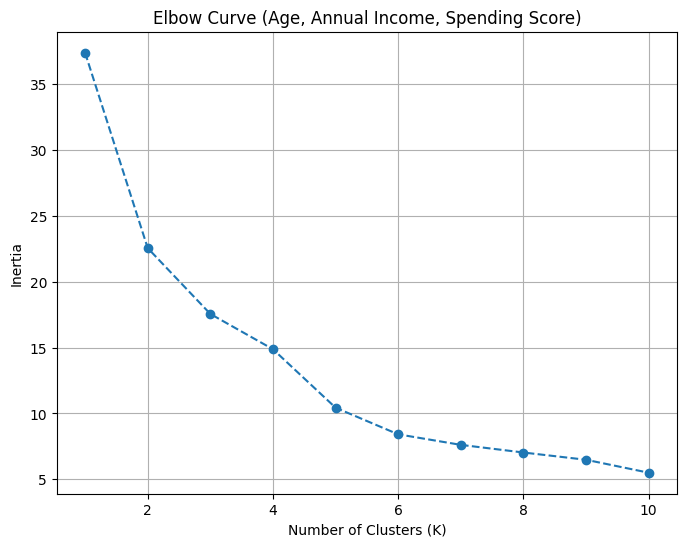

In [ ]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset[['Age_scaled', 'Annual_Income_scaled', 'Spending_Score_scaled']])
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Curve (Age, Annual Income, Spending Score)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

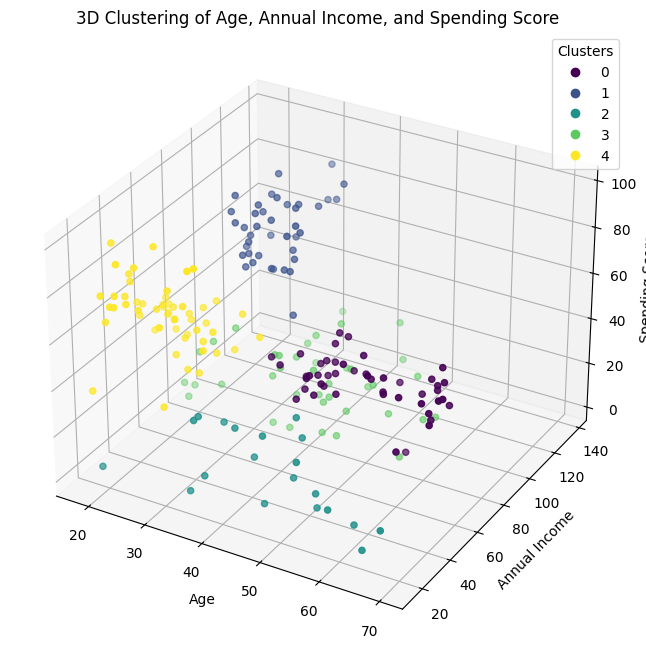

In [ ]:
# Revert scaled data to original scale
dataset[['Age_orig', 'Annual_Income_orig', 'Spending_Score_orig']] = scaler.inverse_transform(
    dataset[['Age_scaled', 'Annual_Income_scaled', 'Spending_Score_scaled']])

# 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    dataset['Age_orig'],
    dataset['Annual_Income_orig'],
    dataset['Spending_Score_orig'],
    c=dataset['Cluster_3D'],
    cmap='viridis'
)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('3D Clustering of Age, Annual Income, and Spending Score')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [ ]:
# Analyze clusters
cluster_summary = dataset.groupby('Cluster_3D')[['Age_orig', 'Annual_Income_orig', 'Spending_Score_orig']].mean()
print("Cluster Summary (Mean Values):")
print(cluster_summary)

# Detailed analysis
print("\nCluster Descriptions:")
for cluster in cluster_summary.index:
    age = cluster_summary.loc[cluster, 'Age_orig']
    income = cluster_summary.loc[cluster, 'Annual_Income_orig']
    spending = cluster_summary.loc[cluster, 'Spending_Score_orig']
    print(f"Cluster {cluster}:")
    print(f"- Average Age: {age:.1f}")
    print(f"- Average Annual Income: {income:.1f}")
    print(f"- Average Spending Score: {spending:.1f}")
    print()

# Recommendations
print("Recommendations for Profit Maximization:")
print("- Focus on clusters with high Spending_Score (e.g., young, high-income, high-spending customers).")
print("- Target high-income, low-spending clusters with premium offers to increase spending.")
print("- Engage low-income, high-spending clusters with loyalty programs to maintain their spending.")

Cluster Summary (Mean Values):
             Age_orig  Annual_Income_orig  Spending_Score_orig
Cluster_3D                                                    
0           56.042553           54.617021            48.234043
1           32.875000           86.100000            81.525000
2           46.250000           26.750000            18.350000
3           39.384615           85.820513            20.102564
4           25.185185           41.092593            62.240741

Cluster Descriptions:
Cluster 0:
- Average Age: 56.0
- Average Annual Income: 54.6
- Average Spending Score: 48.2

Cluster 1:
- Average Age: 32.9
- Average Annual Income: 86.1
- Average Spending Score: 81.5

Cluster 2:
- Average Age: 46.2
- Average Annual Income: 26.8
- Average Spending Score: 18.4

Cluster 3:
- Average Age: 39.4
- Average Annual Income: 85.8
- Average Spending Score: 20.1

Cluster 4:
- Average Age: 25.2
- Average Annual Income: 41.1
- Average Spending Score: 62.2

Recommendations for Profit Maximization:

##  Face recognition

The goal of this exercise is to perform facial recognition using Eigenfaces. This Eigenfaces technique was one of the first successful attempts to classify faces using computer vision. Nowadays, this method is outdated and far surpassed by techniques based on Convolutional Neural Networks (see deep learning module).
For this exercise, a training and test set of faces is provided. The faces are from the Georgia Tech face database (http://www.anefian.com/research/face_reco.htm) and contain faces of 50 different individuals. Fifteen photos were taken of each person.
The provided photos have already undergone some form of preprocessing, such as face cropping and face rotation.
The person's ID can be extracted from the filename of each photo. For example: person22_15.jpg. Here, it refers to the 15th photo of person 22.

This assignment closely resembles the MNIST_PCA demo.

The steps to achieve successful completion are as follows:

- Read the images. Extract the label of the face from the filename.


- Convert the images to grayscale. This is already done in the available code during image reading.

- Resize all images to the same dimensions. For example, 150x110 (150 rows, 110 columns). This can be done via skimage.transform.resize().
- Transform the training and test sets so that each individual image consists of 1 row. In other words, convert a 2D image into a 1D vector by concatenating all rows of the image.This can be done via np.reshape().
- Perform Principle Component Analysis (PCA). In practice, around 40 Eigenfaces are typically used. This is also the number you can initially use. Later, you will be asked to vary this number.
- Train a classifier (logistic regression, SVM, Random Forest Classifier) on the principle components.
- Test the classifier and evaluate its performance (accuracy, recall, precision). Justify why you would choose a particular classifier.
- Perform hyperparameter tuning and try different numbers of Eigenfaces.






### Computing the principle components

In [ ]:
# Reading the training images
training_images = [] # empty list
test_images = [] # empty list
y_train = [] # empty list
y_test = [] # empty list

path = "/content/drive/MyDrive/Google AI Studio/Opgeslagen vanuit Chrome/Faces/Training_images/"
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    training_images.append(imread(os.path.join(path,f),as_gray=True))
    y_train.append(int(f[6:8]))


# Reading the test images
path = "/content/drive/MyDrive/Google AI Studio/Opgeslagen vanuit Chrome/Faces/Test_images"
valid_images = [".jpg",".gif",".png"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    test_images.append(imread(os.path.join(path,f),as_gray=True))
    y_test.append(int(f[6:8]))

print("number of training images: ", len(y_train))
print("number of test images: ", len(y_test))

print("number of unique persons in the training set: ", len(set(y_train)))
print("number of unique persons in the test set: ", len(set(y_test)))

number of training images:  510
number of test images:  250
number of unique persons in the training set:  50
number of unique persons in the test set:  50


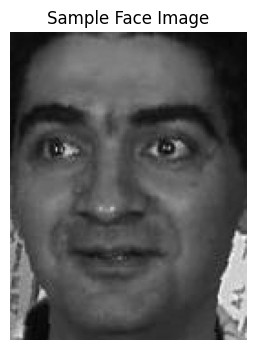

In [ ]:
# Show a face image included in the training set by using plt.imshow(image,cmap='gray')
# Display a sample training image
plt.figure(figsize=(4, 4))
plt.imshow(training_images[0], cmap='gray')
plt.title('Sample Face Image')
plt.axis('off')
plt.show()


In [ ]:
# Scaling to 150 rows and 110 columns
# Skimage transform has the resize method
# transform.resize(image,(rows,cols),mode='constant')
# Define target dimensions
# Define target dimensions

import numpy as np
# Resizing images
rows, cols = 150, 110
training_images_resized = [transform.resize(image, (rows, cols), mode='constant') for image in training_images]
test_images_resized = [transform.resize(image, (rows, cols), mode='constant') for image in test_images]

# Convert images to 1D vectors
X_train = np.array([image.flatten() for image in training_images_resized])
X_test = np.array([image.flatten() for image in test_images_resized])

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
# Create a training set and test set. Transforming images to one dimension (1 row of pixels per image).
# Create training and test sets by transforming images to 1D vectors
X_train = np.array([image.flatten() for image in training_images_resized])
X_test = np.array([image.flatten() for image in test_images_resized])

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes
print("X_train shape (flattened):", X_train.shape)  # e.g., (750, 16500)
print("y_train shape:", y_train.shape)
print("X_test shape (flattened):", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape (flattened): (510, 16500)
y_train shape: (510,)
X_test shape (flattened): (250, 16500)
y_test shape: (250,)


In [ ]:
# Dimensionality reduction: Principle Component Analysis with 40 components
# Apply PCA with 40 components
from sklearn.decomposition import PCA
n_components = 40
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print shapes and variance explained
print("Shape of original training data:", X_train.shape)
print("Shape after PCA (training):", X_train_pca.shape)
print("Shape after PCA (test):", X_test_pca.shape)
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)
print("Total variance explained by 40 components:", np.sum(pca.explained_variance_ratio_))

Shape of original training data: (510, 16500)
Shape after PCA (training): (510, 40)
Shape after PCA (test): (250, 40)
Explained variance ratio of each component: [0.31339932 0.08135073 0.0553734  0.04529559 0.03508513 0.02912233
 0.02518712 0.02249011 0.01619316 0.01555005 0.01342053 0.0125212
 0.01039302 0.00995437 0.00873543 0.00793777 0.0072684  0.00678604
 0.00591546 0.00569399 0.00564576 0.00541144 0.00511317 0.00499011
 0.0048391  0.00462007 0.00451673 0.00433275 0.00423227 0.00384549
 0.00380046 0.00372167 0.00346442 0.00332696 0.00313962 0.00308149
 0.00296398 0.00290677 0.00273014 0.00267642]
Total variance explained by 40 components: 0.8070319946113089


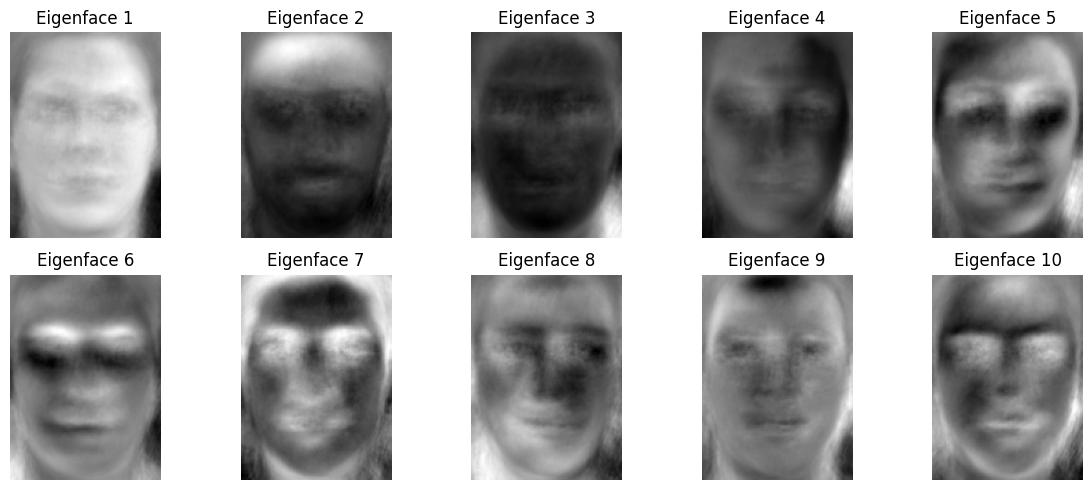

In [ ]:
# Visualize the first 10 principle components (the first 10 Eigenfaces)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(rows, cols), cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()

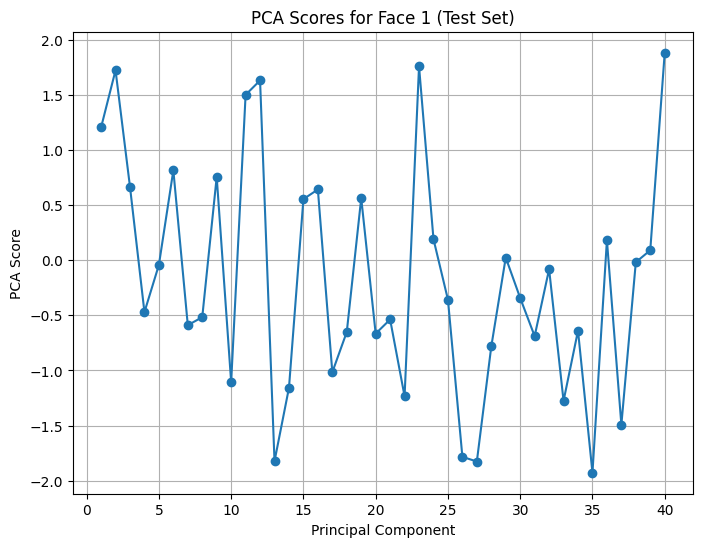


Meaning of PCA Scores:
Each PCA score represents the contribution of the corresponding Eigenface to the face's appearance.
A higher absolute score indicates a stronger influence of that Eigenface.
For example, a high score for the first component (often capturing overall brightness) means the face
aligns closely with that pattern. The scores collectively form a compact representation used by
classifiers to distinguish between individuals.



In [ ]:
# Plot the PCA scores of a specific face.
# What is the meaning of these scores?
face_index = 0
pca_scores = X_test_pca[face_index]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_scores) + 1), pca_scores, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("PCA Score")
plt.title(f"PCA Scores for Face {face_index + 1} (Test Set)")
plt.grid(True)
plt.show()

# Explanation of PCA scores
print("""
Meaning of PCA Scores:
Each PCA score represents the contribution of the corresponding Eigenface to the face's appearance.
A higher absolute score indicates a stronger influence of that Eigenface.
For example, a high score for the first component (often capturing overall brightness) means the face
aligns closely with that pattern. The scores collectively form a compact representation used by
classifiers to distinguish between individuals.
""")


In [ ]:
# What percentage of the total variance is explained by all principle components?
import numpy as np
total_variance_explained = np.sum(pca.explained_variance_ratio_)
print(f"Total variance explained by all components: {total_variance_explained}")


Total variance explained by all components: 0.8070319946113089


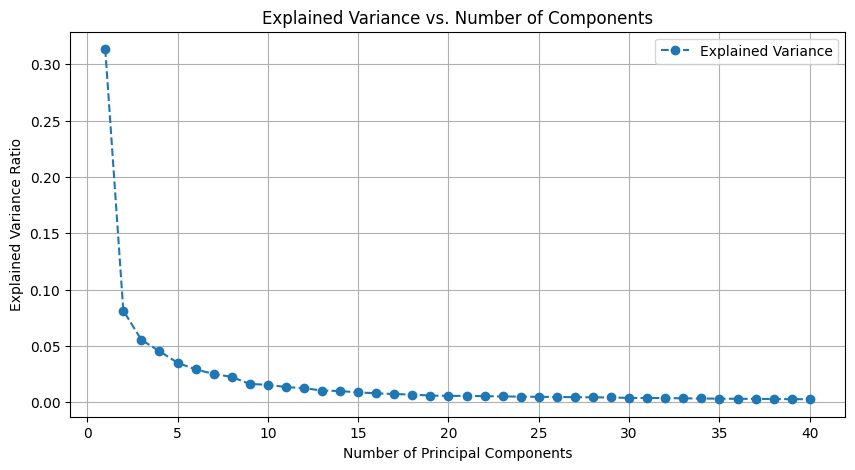

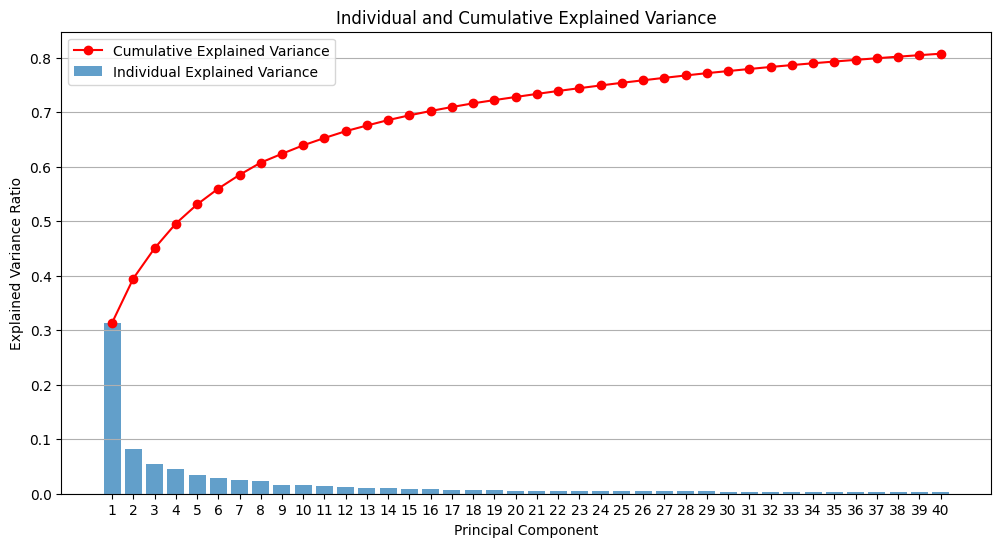

Total variance explained by 40 components: 0.8070319946113089


In [ ]:
# Generate a combined plot of: the explained variance as a function of the number of principle components.
# Generate a Bar chart of the explained variance of the individual principle components and, on the other hand, the cumulative explained variance.
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot individual explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.legend()
plt.show()

# Plot combined individual and cumulative variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual and Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(axis='y')
plt.legend()
plt.show()

# Total variance
print(f"Total variance explained by {n_components} components:", np.sum(explained_variance))


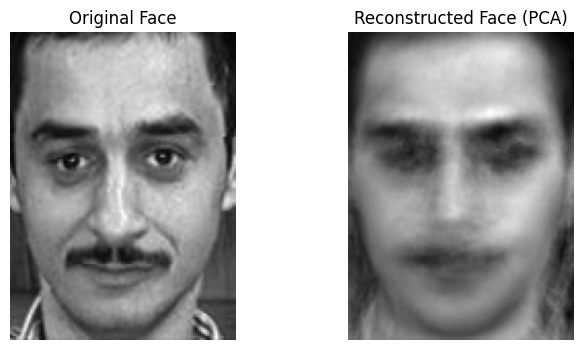

In [ ]:
# Reconstruct a face based on its principle components
# Reconstruct a face from the test set
face_index = 0
original_face = X_test[face_index]
pca_scores = pca.transform([original_face])
reconstructed_face = pca.inverse_transform(pca_scores).reshape(rows, cols)
original_face_img = original_face.reshape(rows, cols)

# Visualize original vs reconstructed
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_face_img, cmap='gray')
plt.title('Original Face')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face, cmap='gray')
plt.title('Reconstructed Face (PCA)')
plt.axis('off')
plt.show()

### Classification

Train multiple classifiers (logistic regression, SVM, Random Forest Trees, ensembles) for facial recognition. Use the weights obtained through PCA analysis as features. Perform cross-validation to find the optimal hyperparameters.

- Experiment with the number of Eigenfaces used. What happens to the accuracy of the classifiers when you decrease the number (less than 40), and what if you increase it?
- Does the number of Eigenfaces used significantly affect computation time?
- Clearly describe which method you prefer.
- Visualize some misclassified faces.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time


In [ ]:
# Scaling of the eigenfaces
# Define classifiers and parameter grids
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42)
}
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [10, None]}
}

# Experiment with different numbers of Eigenfaces
n_components_list = [20, 40, 60, 80]
results = {}

for n_components in n_components_list:
    print(f"\nTesting with {n_components} Eigenfaces...")
    # Apply PCA
    pca = PCA(n_components=n_components, whiten=True)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for name, clf in classifiers.items():
        start_time = time.time()
        # Perform GridSearchCV
        grid = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy')
        grid.fit(X_train_pca, y_train)
        y_pred = grid.predict(X_test_pca)
        end_time = time.time()

        # Store results
        results[(name, n_components)] = {
            'best_params': grid.best_params_,
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred, zero_division=0),
            'cm': confusion_matrix(y_test, y_pred),
            'time': end_time - start_time
        }

        # Print results
        print(f"\n{name} with {n_components} Eigenfaces:")
        print(f"Best Parameters: {results[(name, n_components)]['best_params']}")
        print(f"Accuracy: {results[(name, n_components)]['accuracy']}")
        print(f"Training Time: {results[(name, n_components)]['time']:.2f} seconds")
        print("Classification Report:")
        print(results[(name, n_components)]['report'])



Testing with 20 Eigenfaces...

Logistic Regression with 20 Eigenfaces:
Best Parameters: {'C': 1}
Accuracy: 0.772
Training Time: 0.80 seconds
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.75      0.60      0.67         5
           3       0.75      0.60      0.67         5
           4       0.50      0.80      0.62         5
           5       1.00      0.60      0.75         5
           6       0.50      0.60      0.55         5
           7       0.83      1.00      0.91         5
           8       1.00      0.80      0.89         5
           9       0.12      0.20      0.15         5
          10       1.00      0.80      0.89         5
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         5
          13       0.60      0.60      0.60         5
          14       0.50      0.60      0.55         5
          15       1.00 

In [ ]:
# Classification


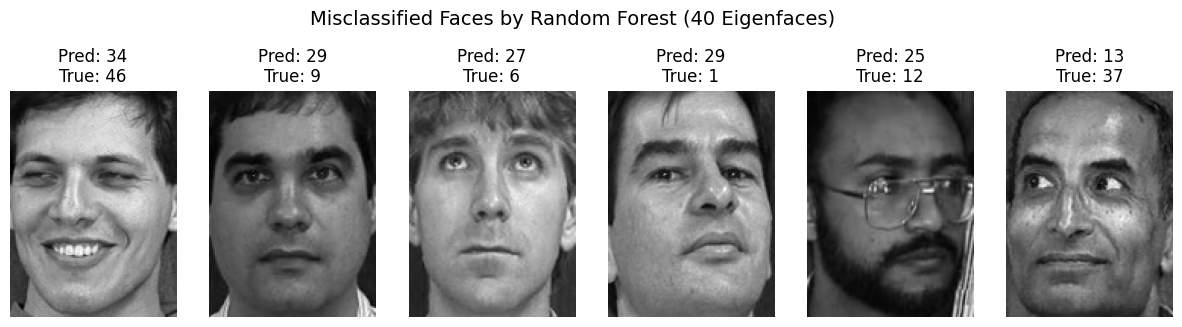

In [ ]:
# Wrongly classified faces:

# Train Random Forest with 40 Eigenfaces for misclassification analysis
pca = PCA(n_components=40, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
rf = RandomForestClassifier(random_state=42, **results[('Random Forest', 40)]['best_params'])
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_test_pca)

# Identify misclassified faces
misclassified_indices = np.where(y_pred != y_test)[0]
num_misclassified = min(len(misclassified_indices), 6)

# Visualize misclassified faces
plt.figure(figsize=(15, 4))
plt.suptitle('Misclassified Faces by Random Forest (40 Eigenfaces)', fontsize=14)
for i, idx in enumerate(misclassified_indices[:num_misclassified]):
    plt.subplot(1, num_misclassified, i + 1)
    plt.imshow(X_test[idx].reshape(rows, cols), cmap='gray')
    plt.title(f'Pred: {y_pred[idx]}\nTrue: {y_test[idx]}')
    plt.axis('off')
plt.show()

See if you can further increase the accuracy using ensemble methods such as boosting.


Training AdaBoost...
AdaBoost Accuracy: 0.084
Training Time: 1.03 seconds
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.50      0.20      0.29         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00      0.00    

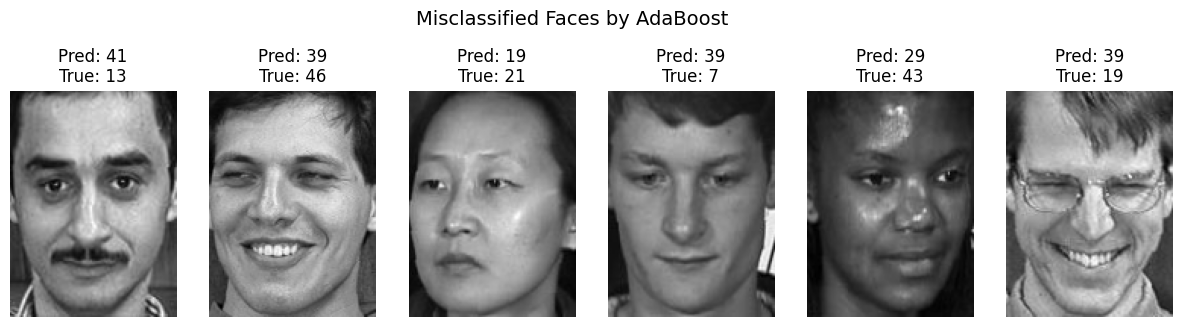


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.5
Training Time: 50.76 seconds
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       1.00      0.40      0.57         5
           3       0.67      0.40      0.50         5
           4       0.24      0.80      0.36         5
           5       0.43      0.60      0.50         5
           6       0.33      0.60      0.43         5
           7       0.29      0.40      0.33         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.50      0.60      0.55         5
          11       0.60      0.60      0.60         5
          12       0.75      0.60      0.67         5
          13       0.25      0.20      0.22         5
          14       0.38      0.60      0.46         5
          15       0.75      0.60      0.67         5
          16       0

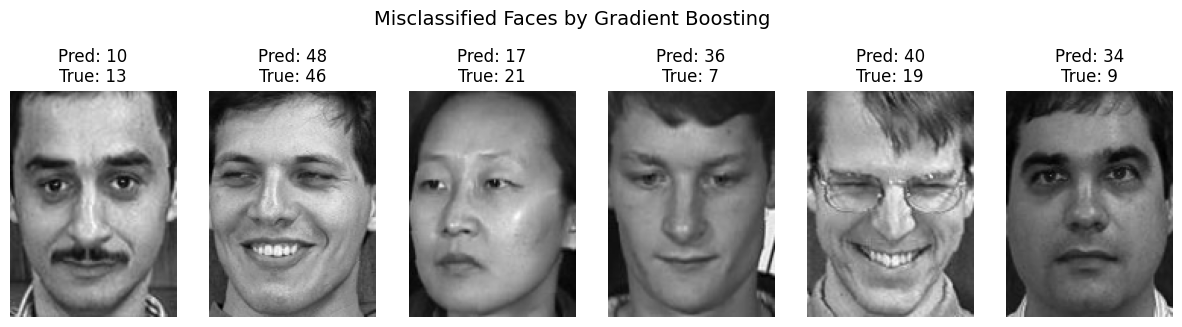


Training Voting Ensemble...
Voting Ensemble Accuracy: 0.824
Training Time: 1.65 seconds
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      0.60      0.75         5
           3       1.00      0.80      0.89         5
           4       0.50      0.80      0.62         5
           5       1.00      0.80      0.89         5
           6       0.60      0.60      0.60         5
           7       1.00      1.00      1.00         5
           8       1.00      0.80      0.89         5
           9       0.67      0.40      0.50         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      0.80      0.89         5
          13       0.67      0.80      0.73         5
          14       0.57      0.80      0.67         5
          15       1.00      0.80      0.89         5
          16       0.40

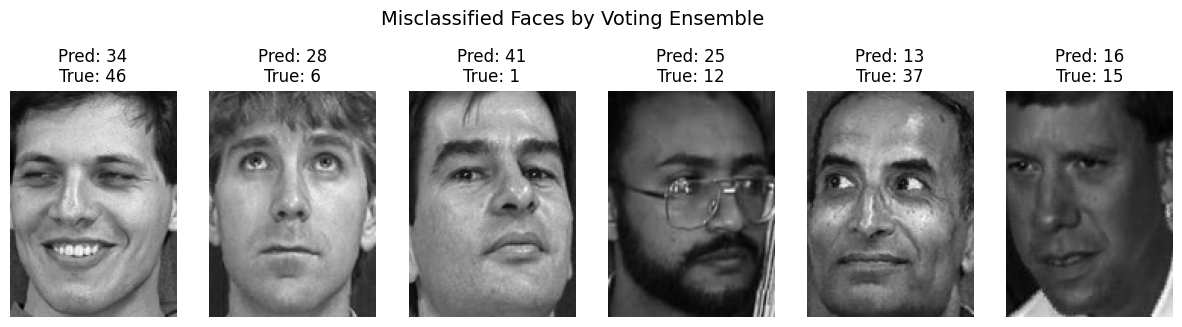

In [ ]:
# Ensemble methods
# Define ensemble classifiers
ensemble_models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'Voting Ensemble': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, **results[('Logistic Regression', 40)]['best_params'])),
        ('svm', SVC(probability=True, **results[('SVM', 40)]['best_params'])),
        ('rf', RandomForestClassifier(random_state=42, **results[('Random Forest', 40)]['best_params']))
    ], voting='soft')
}

# Train and evaluate ensembles with 40 Eigenfaces
pca = PCA(n_components=40, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

for name, model in ensemble_models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    end_time = time.time()

    # Print results
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Visualize misclassified faces
    misclassified_indices = np.where(y_pred != y_test)[0]
    num_misclassified = min(len(misclassified_indices), 6)
    plt.figure(figsize=(15, 4))
    plt.suptitle(f'Misclassified Faces by {name}', fontsize=14)
    for i, idx in enumerate(misclassified_indices[:num_misclassified]):
        plt.subplot(1, num_misclassified, i + 1)
        plt.imshow(X_test[idx].reshape(rows, cols), cmap='gray')
        plt.title(f'Pred: {y_pred[idx]}\nTrue: {y_test[idx]}')
        plt.axis('off')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
